In [1]:
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import urllib as u
import numpy as np
import csv

In [2]:
# Read in data
df = pd.read_csv('data/sites/kpi10818.csv')
df.head()

,Site_ID,Grade_Description,Date,Price,Profit,Volume,Competitor_Price,Fuel_Cost
0,10818,Midgrade Gas,2019-01-03,2.599,0.0,0.0,2.365667,1.454955
1,10818,Midgrade Gas,2019-01-10,2.599,0.0,0.0,2.311500,1.508637
2,10818,Premium Gas,2019-01-10,2.849,0.0,0.0,2.755667,1.611579
3,10818,Midgrade Gas,2019-01-13,2.599,0.0,0.0,2.374000,1.507373
4,10818,Premium Gas,2019-01-13,2.849,0.0,0.0,2.749000,1.616662


In [3]:
# Convert Date column to datetime
df['Date'] =  df['Date'].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Site_ID            2024 non-null   int64         
 1   Grade_Description  2024 non-null   object        
 2   Date               2024 non-null   datetime64[ns]
 3   Price              2024 non-null   float64       
 4   Profit             2024 non-null   float64       
 5   Volume             2024 non-null   float64       
 6   Competitor_Price   2024 non-null   float64       
 7   Fuel_Cost          2024 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 126.6+ KB


In [4]:
print(df.Grade_Description.unique())

['Midgrade Gas' 'Premium Gas' 'Unleaded Gas']


In [5]:
# Locate separate gas types
unleaded =  df.loc[df['Grade_Description'] == 'Unleaded Gas']
midgrade = df.loc[df['Grade_Description'] == 'Midgrade Gas']
premium = df.loc[df['Grade_Description'] == 'Premium Gas']

In [6]:
# # Plot
# fig, ax = plt.subplots()
# ax.plot(unleaded['Date'], unleaded[['Price', 'Fuel_Cost', 'Profit']])
# ax.set_ylabel('Price')
# ax.set_xlabel('Date')
# ax.set_title('Price vs Comp Price vs Cost')
# # ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
# # ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
# # plt.xticks(rotation=45)
# # plt.text(x=1970, y=400, s=r'Stock Price at this interval')
# # ax.properties()['children'][0].set_color('black')
# ax.properties()['children'][1].set_color('black')
# ax.properties()['children'][2].set_color('purple')
# fig.set_size_inches(18.5, 10.5)
# plt.grid()
# ax.legend(['Price', 'Fuel_Cost', 'Profit'], loc='upper left')
# ax.set_facecolor('xkcd:light grey')
# # graphPath = 'data/stocks'
# # graphName = input('Save graph as: ') + '.png'
# # graphFileName = os.path.join(graphPath, graphName)
# # plt.savefig(graphFileName)

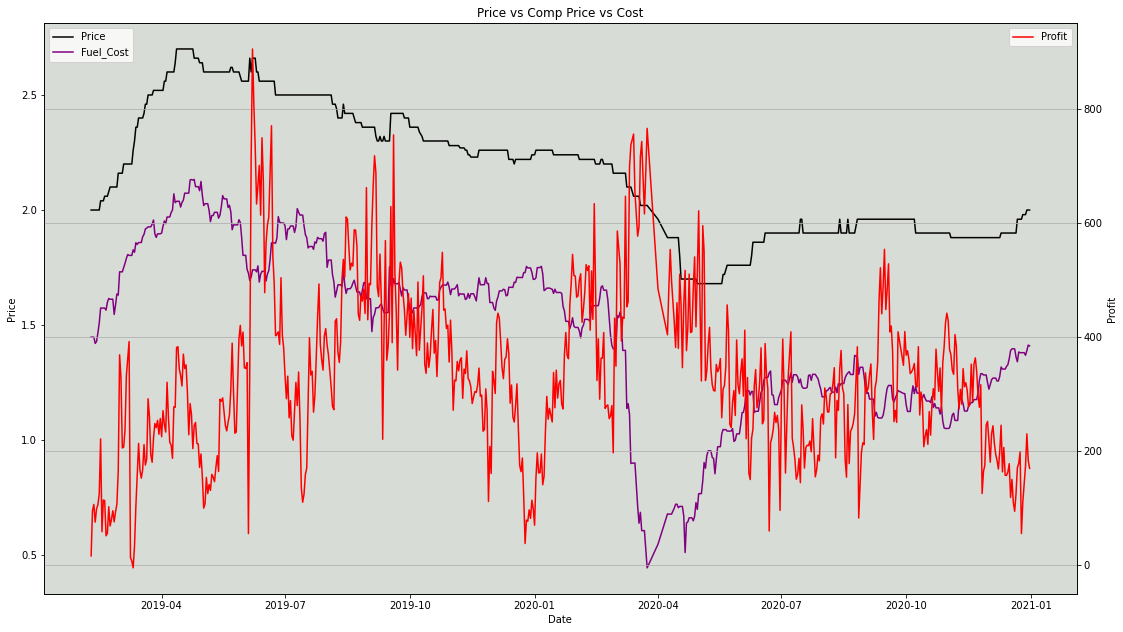

In [7]:
# Plot
fig, ax1 = plt.subplots()
ax1.plot(unleaded['Date'], unleaded[['Price', 'Fuel_Cost']])
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.set_title('Price vs Comp Price vs Cost')
ax1.properties()['children'][0].set_color('black')
ax1.properties()['children'][1].set_color('purple')

ax2 = ax1.twinx()
ax2.plot(unleaded['Date'], unleaded['Profit'])
ax2.set_ylabel('Profit')
ax2.properties()['children'][0].set_color('red')
# ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
# plt.xticks(rotation=45)
# plt.text(x=1970, y=400, s=r'Stock Price at this interval')

fig.set_size_inches(18.5, 10.5)
plt.grid()
ax1.legend(['Price', 'Fuel_Cost', 'Profit'], loc='upper left')
ax1.set_facecolor('xkcd:light grey')

ax2.legend(['Profit'])
# graphPath = 'data/stocks'
# graphName = input('Save graph as: ') + '.png'
# graphFileName = os.path.join(graphPath, graphName)
# plt.savefig(graphFileName)

In [8]:
df2 = df.pivot(index='Date', columns='Grade_Description', values='Profit')

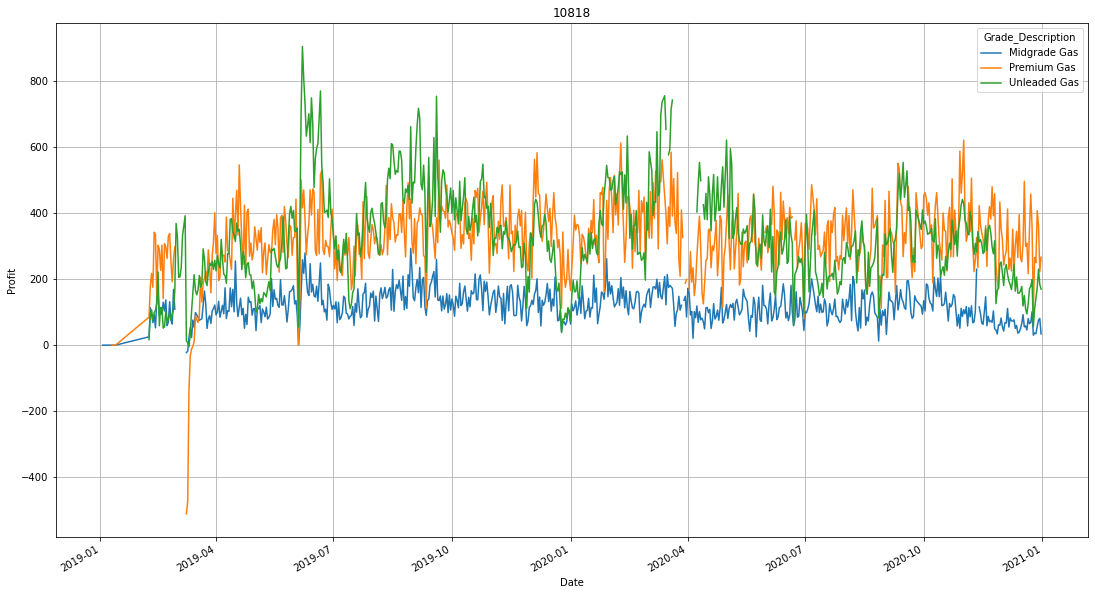

In [10]:
df2.plot(figsize=(18.5, 10.5), xlabel='Date', ylabel='Profit', title='10818', grid=True)
plt.show()